<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#连续值特征的数据进行分类" data-toc-modified-id="连续值特征的数据进行分类-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>连续值特征的数据进行分类</a></span><ul class="toc-item"><li><span><a href="#导入需要的工具库" data-toc-modified-id="导入需要的工具库-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>导入需要的工具库</a></span></li><li><span><a href="#加载数据" data-toc-modified-id="加载数据-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>加载数据</a></span></li><li><span><a href="#构建模型" data-toc-modified-id="构建模型-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>构建模型</a></span></li></ul></li></ul></div>

## 连续值特征的数据进行分类

### 导入需要的工具库

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn import tree
from sklearn.datasets import load_iris

### 加载数据

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [4]:
iris_feature_name = iris.feature_names
iris_features = iris.data
iris_target_name = iris.target_names
iris_target = iris.target

In [6]:
iris_feature_name

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [9]:
iris_features[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [16]:
iris_target_name

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
iris_features.shape

(150, 4)

### 构建模型

In [19]:
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(iris_features, iris_target)

In [20]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
import pydotplus
from IPython.display import Image, display

In [25]:
import os

In [31]:
os.environ["PATH"] += ";C:/Program Files (x86)/Graphviz2.38/bin/"

In [23]:
dot_data = tree.export_graphviz(clf,
                                out_file = None,
                                feature_names = iris_feature_name,
                                class_names = iris_target_name,
                                filled = True,
                                rounded = True
                               )

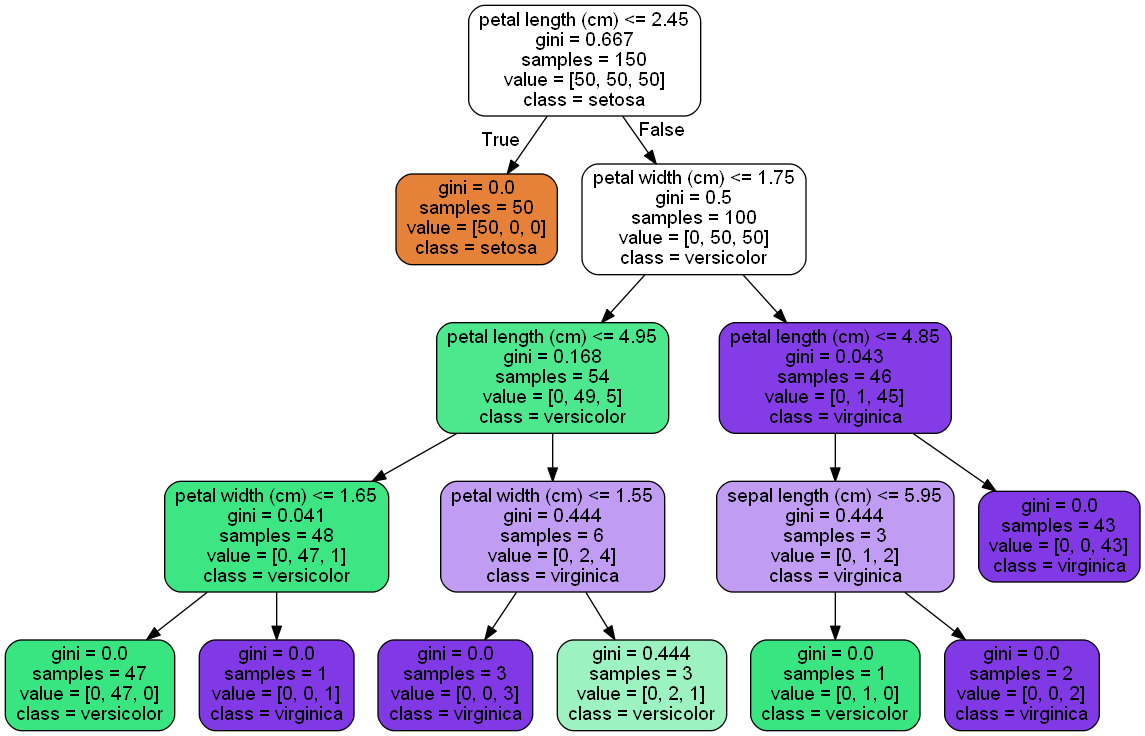

In [33]:
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))